# Laboratorio 3: Percepción Remota Aplicada

## Álvaro Paredes (alvaro.paredes@dataobservatory.net) | Javier Lopatin (javier.lopatin@uai.cl)

En este práctico vamos a ver cómo utilizar Jupyter Notebooks con Kernel de Python para generar subrproductos de un DEM y realizar análisis sobre ellos.

Primero, instalaremos las librerias correspondientes:



In [ ]:
%%capture
# Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install geopandas patool
!pip install xarray rasterio rioxarray xarray-spatial

In [ ]:
# cargamos las librerias en el sistema
import xarray as xr
import rioxarray as riox
import patoolib
import os
import matplotlib.pyplot as plt
import xrspatial as xrs

# función para cargar un raster a la memoria del sistema
def rasterio_open(f):
    return riox.open_rasterio(f)

In [ ]:
# descargamos los datos necesarios para el laboratorio. La dirección de descarga puede ser cambiada
# alternativamente, pueden descargar y extraer los datos de forma manual en el PC
%%capture
!rm -R Lab01*
!wget https://github.com/alvaroparedesl/percepcion_remota/raw/main/Data/Lab01.rar
!mkdir Lab01
patoolib.extract_archive("Lab01.rar", outdir='Lab01')

patool: Extracting Lab01.rar ...
patool: running /usr/bin/unrar x -- /content/Lab01.rar
patool:     with cwd='Lab01'
patool: ... Lab01.rar extracted to `Lab01'.


## Cargar Datos

In [ ]:
dem = rasterio_open('Lab01/dem_valparaiso_corte.tif').squeeze()
dem

<xarray.DataArray (y: 704, x: 1285)>
[904640 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -71.74 -71.74 -71.74 ... -71.38 -71.38 -71.38
  * y            (y) float64 -33.02 -33.02 -33.02 ... -33.21 -33.21 -33.21
    spatial_ref  int64 0
Attributes:
    _FillValue:    -32768.0
    scale_factor:  1.0
    add_offset:    0.0

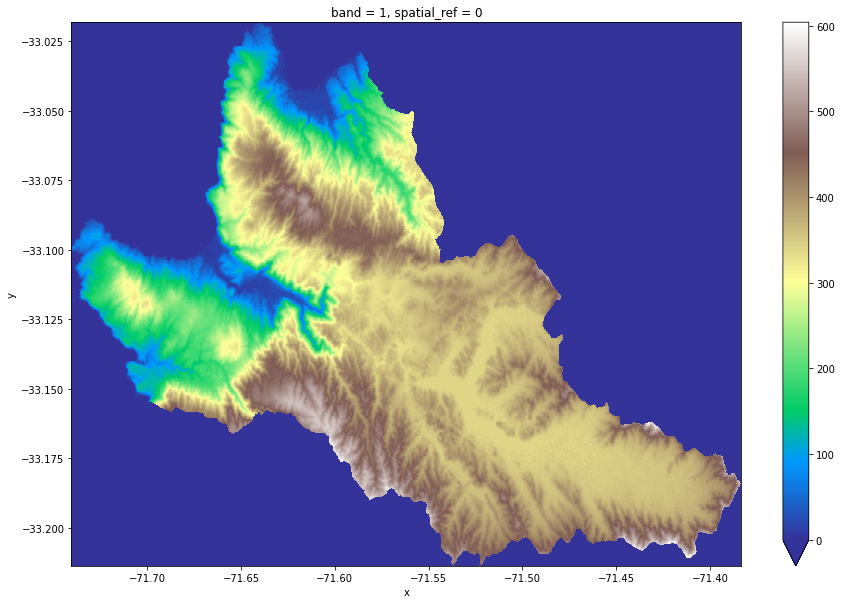

In [ ]:
dem.plot(vmin=0, figsize=(15, 10), cmap='terrain')

## DEM análisis

Pendiente, orientación, sombreado

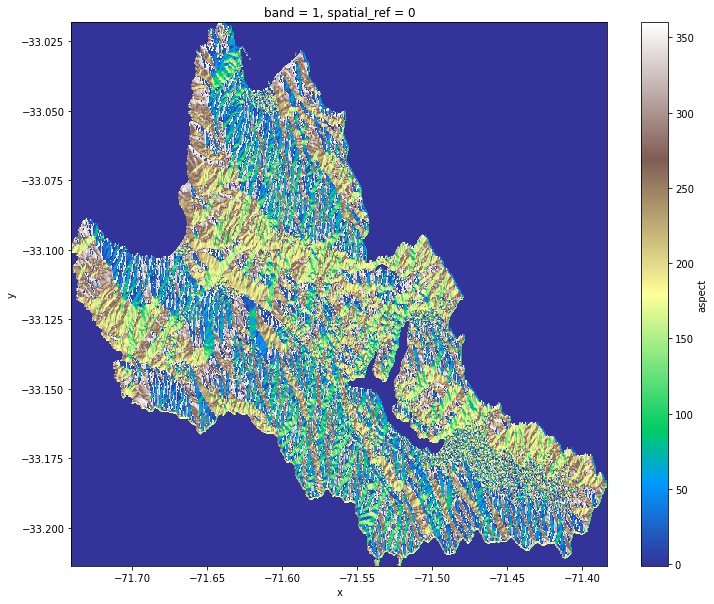

In [ ]:
orientacion = xrs.aspect(dem)
orientacion.plot(figsize=(12, 10), vmin=-1, vmax=360, cmap='terrain')

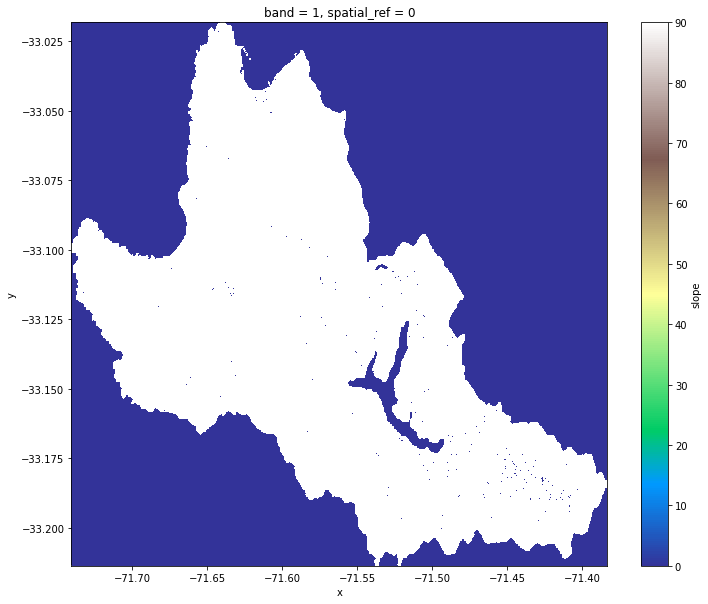

In [ ]:
pendiente = xrs.slope(dem)
pendiente.plot(figsize=(12, 10), vmin=0, vmax=90, cmap='terrain')

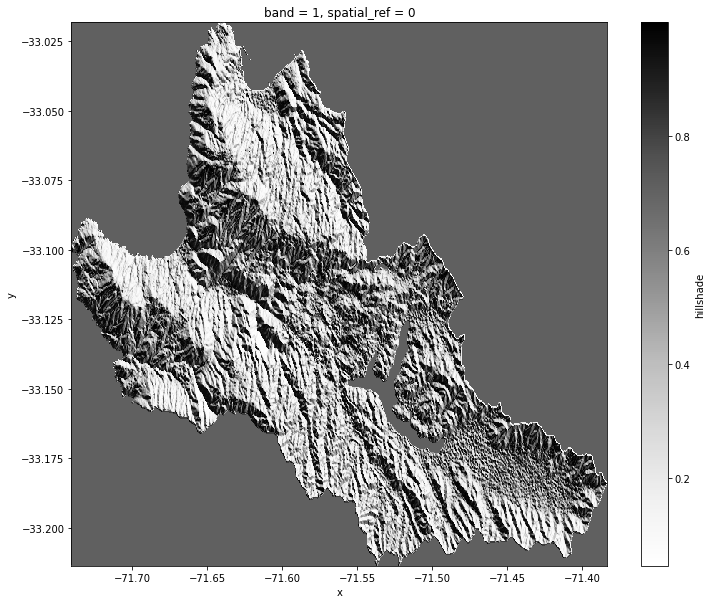

In [ ]:
sombreado = xrs.hillshade(dem, angle_altitude=25, azimuth=225)
sombreado.plot(figsize=(12, 10), cmap='Greys')

### Actividades

1. Enmascare (transforme a NaN) aquellas zonas que no contengan datos válidos en el DEM.
1. Encuentre las zonas que tengan una pendiente superior al 20% y de exposición Norte.
1. Repita lo anterior, pero considerando exposición sur
1. Compare las diferencias del índice NDVI en ambos sectores (norte y sur). Puede ser a través de un histograma, un gráfico o un mapa. ¿Cuál de los dos sectores tiene mayor vigor vegetacional? ¿Cuál cree que es más suceptible a un incendio?